In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
#show different between "true" value and "predicted" value
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn import tree

### Decision Tree

In [2]:
#https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial/data
filename = 'car_evaluation.csv'
dataframe = pd.read_csv(filename) 
#features: "buying price", "maintenance cost", "number of doors", "number of persons","lug_boot", "safety", 
#label: "decision"

dataframe.columns = ["buying price", "maintenance cost", "number of doors", "number of persons","lug_boot", "safety","decision"]
dataframe

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [56]:
#dataframe["buying price"].drop_duplicates()
# dataframe["decision"].drop_duplicates()
# 0       unacc
# 226       acc
# 1096    vgood
# 1198     good
#len(dataframe[(dataframe["buying price"] == "low") & (dataframe["decision"] == "good")])
def get_attributes_by_target(attribute_name, attribute_value):
    unacc = len(dataframe[(dataframe[attribute_name] == attribute_value) & (dataframe["decision"] == "unacc")])
    acc = len(dataframe[(dataframe[attribute_name] == attribute_value) & (dataframe["decision"] == "acc")])
    good = len(dataframe[(dataframe[attribute_name] == attribute_value) & (dataframe["decision"] == "good")])
    vgood = len(dataframe[(dataframe[attribute_name] == attribute_value) & (dataframe["decision"] == "vgood")])
    total = unacc + acc + good + vgood
    entropy = -(unacc/total)*(0.00 if unacc ==0 else math.log2(unacc/total))\
              -(acc/total)*(0.00 if acc ==0 else math.log2(acc/total))\
              -(good/total)*(0.00 if good ==0 else math.log2(good/total))\
              -(vgood/total)*(0.00 if vgood ==0 else math.log2(vgood/total))
    print ('unacc: {0}'.format(unacc))
    print ('acc: {0}'.format(acc))
    print ('good: {0}'.format(good))
    print ('vgood: {0}'.format(vgood))
    print ('sum: {0}'.format(total))  
    print ('entropy: {0}'.format(entropy))
    
# def get_attributes_by_target():
#     unacc = len(dataframe[dataframe["decision"] == "unacc"])
#     acc = len(dataframe[dataframe["decision"] == "acc"])
#     good = len(dataframe[dataframe["decision"] == "good"])
#     vgood = len(dataframe[dataframe["decision"] == "vgood"])
#     print ('unacc: {0}'.format(unacc))
#     print ('acc: {0}'.format(acc))
#     print ('good: {0}'.format(good))
#     print ('vgood: {0}'.format(vgood))
#     print ('sum: {0}'.format(unacc + acc + good + vgood))
get_attributes_by_target("buying price", "low")
#get_attributes_by_target()

unacc: 258
acc: 89
good: 46
vgood: 39
sum: 432
entropy: 1.570972123067498


In [42]:
#Entropy
-258/432*math.log2(258/432) - 89/432*math.log2(89/432) - 46/432*math.log2(46/432) - 39/432*math.log2(39/432)

1.570972123067498

In [3]:
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

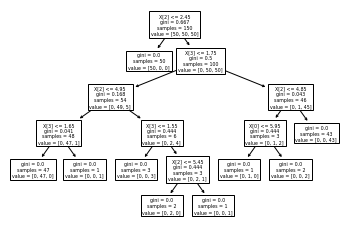

In [4]:
tree.plot_tree(clf)

In [5]:
import graphviz 

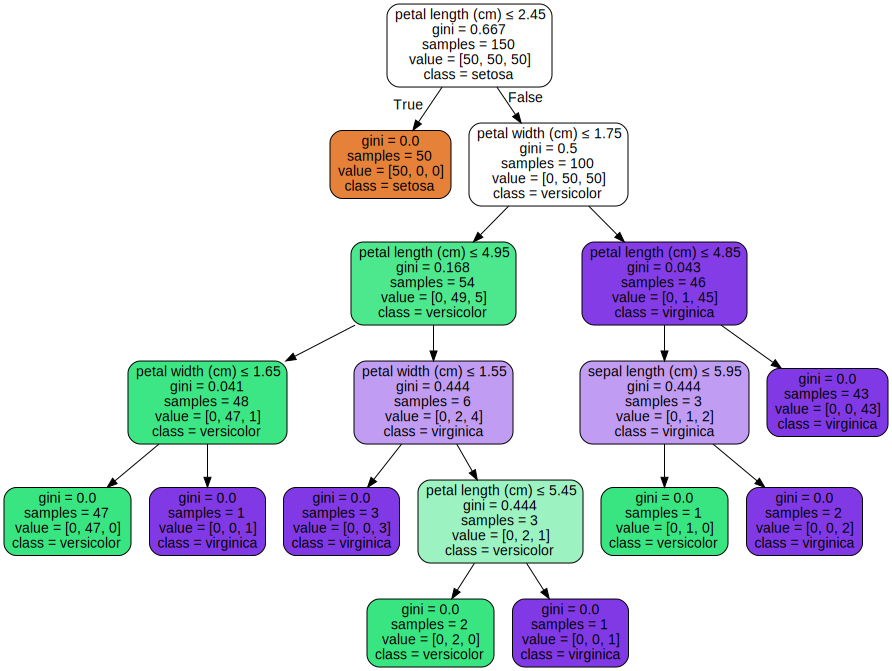

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, 
                                rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [7]:
iris = load_iris()
X, y = iris.data, iris.target
dir(iris)
iris['feature_names']
#iris['target_names']
#iris['target']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3